In [8]:
## Data analysis project on netflix movies

# Data analysis project on Netflix movies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd

# Attempt to read the CSV with error handling and different engine

try:
  df = pd.read_csv("/content/project 1/mymoviedb.csv", engine='python', on_bad_lines='skip', encoding='utf-8') # Using Python engine and skipping bad lines
  print("CSV loaded successfully using Python engine.")  # Print success message
except pd.errors.ParserError as e:
  print(f"Error reading CSV: {e}")  # Print error message
  print("Trying to fix potential issues and re-read...")

  # Try handling potential issues that caused the ParserError
  try:
    df = pd.read_csv("/content/project 1/mymoviedb.csv", engine='python', delimiter=';', on_bad_lines='skip', encoding='utf-8') # Trying a different delimiter
    print("CSV loaded successfully using Python engine and ';' delimiter.")
  except pd.errors.ParserError as e:
    print(f"Error reading CSV with ';' delimiter: {e}")  # Print error message if ';' delimiter fails
    print("Trying with lineterminator='\n'")
    try:
      df = pd.read_csv("/content/project 1/mymoviedb.csv", engine='python', lineterminator='\n', on_bad_lines='skip', encoding='utf-8')  # Trying with lineterminator='\n'
      print("CSV loaded successfully using Python engine and lineterminator='\n'.")  # Print success message
    except pd.errors.ParserError as e:
      print(f"Error reading CSV with lineterminator='\n': {e}")  # Print error message if lineterminator='\n' fails
      print("Unable to automatically resolve the issue. Please further inspect the CSV file for errors.")

CSV loaded successfully using Python engine.


In [8]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [9]:
df.shape

(9837, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [11]:
 df.isnull().sum()

,0
Release_Date,0
Title,9
Overview,9
Popularity,10
Vote_Count,10
Vote_Average,10
Original_Language,10
Genre,11
Poster_Url,11


In [12]:
df.duplicated().sum()

0

In [13]:
 df.dtypes

,0
Release_Date,object
Title,object
Overview,object
Popularity,float64
Vote_Count,object
Vote_Average,object
Original_Language,object
Genre,object
Poster_Url,object


## Exploration Summary
*    we have a dataframe consisting of 9837 rows and 9 columns.
*    our dataset looks a bit tidy with no NaNs nor duplicated values.
*    Vote_Count and Vote_average columns has object type we have to change  

them to integer and float
*    Release_Date column needs to be casted into date time and to extract only * the Overview, Original_Languege and Poster-Url wouldn't be so useful during analys
*   there is noticable outliers in Popularity column
*   Vote_Average bettter be categorised for proper analysis.
*   Genre column has comma saperated values and white spaces that needs to be handle



## 1) Cleaning data

In [14]:
#changing data type of column Vote_Count to integer and Vote_Average to float
# Replace non-numeric values in 'Vote_Count' with 0
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce').fillna(0).astype(int)

# Convert 'Vote_Average' to numeric, handling errors
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

# Fill NaN values with 0 and convert to float
df['Vote_Average'] = df['Vote_Average'].fillna(0).astype(float)

In [15]:
df.dtypes

,0
Release_Date,object
Title,object
Overview,object
Popularity,float64
Vote_Count,int64
Vote_Average,float64
Original_Language,object
Genre,object
Poster_Url,object


## Basic Statistical information

In [16]:
 df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9837.000000,9837.000000
mean,40.320570,1391.386093,6.432266
std,108.874308,2610.258502,1.149494
min,7.100000,0.000000,0.000000
25%,16.127500,146.000000,5.900000
50%,21.191000,443.000000,6.500000
75%,35.174500,1375.000000,7.100000
max,5083.954000,31077.000000,10.000000


##  Droping non necessery columns

In [17]:
# Droping non necessery columns
df.drop(columns=["Overview","Original_Language","Poster_Url"],inplace=True)

In [18]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [19]:
 df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


## Changing release date data type and extracting year just

In [20]:
# Attempt to convert 'Release_Date' to datetime, handling errors
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year only for valid dates
df['Release_Date'] = df['Release_Date'].dt.year.fillna(0).astype(int)  # Fill NaN with 0 and convert to int

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9837 non-null   int64  
 1   Title         9828 non-null   object 
 2   Popularity    9827 non-null   float64
 3   Vote_Count    9837 non-null   int64  
 4   Vote_Average  9837 non-null   float64
 5   Genre         9826 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 461.2+ KB


In [22]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


## categorizing Vote_Average column
*  We would cut the Vote_Average values and make 4 categories: popular, average,
below_avg not_popular to describe it more using catigorize_col() function
provided above.

In [23]:
def categorize_vote_average(vote_average):
  if vote_average >= 7.5:
    return "popular"
  elif vote_average >= 6.0 and vote_average < 7.5:
    return "average"
  elif vote_average >= 4.0 and vote_average <6.0:
    return "below_average"
  else:
    return "not_popular"

df['Vote_Average'] = df['Vote_Average'].apply(categorize_vote_average)

In [24]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [25]:
df["Vote_Average"].value_counts()

,count
Vote_Average,
average,5817
below_average,2388
popular,1442
not_popular,190


## Checking NAN values and Droping it

In [26]:
df.isna().sum()

,0
Release_Date,0
Title,9
Popularity,10
Vote_Count,0
Vote_Average,0
Genre,11


In [27]:
df.dropna(inplace=True)

## Confirming NAN Drop

In [28]:
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


## now we would split Genres column into a list and then explode dataframe to have onle one genre per movie

In [29]:
df["Genre"]=df["Genre"].str.split(", ")
df=df.explode("Genre").reset_index(drop=True)

In [30]:
df['Genre']=df['Genre'].astype("category")

In [31]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [32]:
df["Genre"].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [33]:
df["Vote_Average"]=df["Vote_Average"].astype("category")
df["Vote_Average"].dtypes

CategoricalDtype(categories=['average', 'below_average', 'not_popular', 'popular'], ordered=False, categories_dtype=object)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  int64   
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  int64   
 4   Vote_Average  25792 non-null  category
 5   Genre         25792 non-null  category
dtypes: category(2), float64(1), int64(2), object(1)
memory usage: 857.4+ KB


In [35]:
df.nunique()

,0
Release_Date,102
Title,9512
Popularity,8159
Vote_Count,3266
Vote_Average,4
Genre,19


In [36]:
df.shape

(25792, 6)

* Now the data become clean and tidy ,we are left with 6 columns and 25792 rows to dig during our analysis


# 2) Data Visualization
*   we would use Matplotlib and seaborn for making some important visuals to gain insights about data

In [38]:
# setting up seaborn configurations

sns.set_style("whitegrid")

# Q1: What is the most frequent genre in the dataset?

In [39]:
df["Genre"].describe()

,Genre
count,25792
unique,19
top,Drama
freq,3744


<Figure size 1000x1000 with 0 Axes>

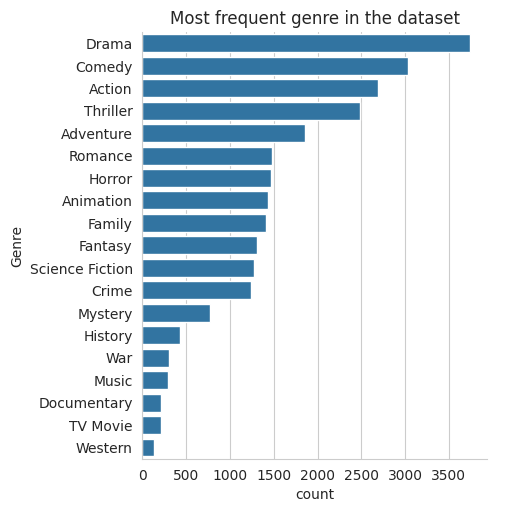

In [41]:
# visualizing Genre column
plt.figure(figsize=(10,10))
sns.catplot(data=df,y="Genre",kind="count",order=df["Genre"].value_counts().index)
plt.title("Most frequent genre in the dataset")
plt.show()

*   we can notice from the above visual that Drama genre is the most frequent genre
in our dataset and has appeared more than 14.5% of the times among 19 other
genres.

# Q2: What genres has highest votes ?

In [42]:
df["Vote_Average"].describe()

,Vote_Average
count,25792
unique,4
top,average
freq,15677


In [43]:
df["Vote_Average"].value_counts()

,count
Vote_Average,
average,15677
below_average,5908
popular,3803
not_popular,404


In [46]:
df[(df['Genre']=="Drama") & (df["Vote_Average"]=="popular")].value_counts().sum()

778

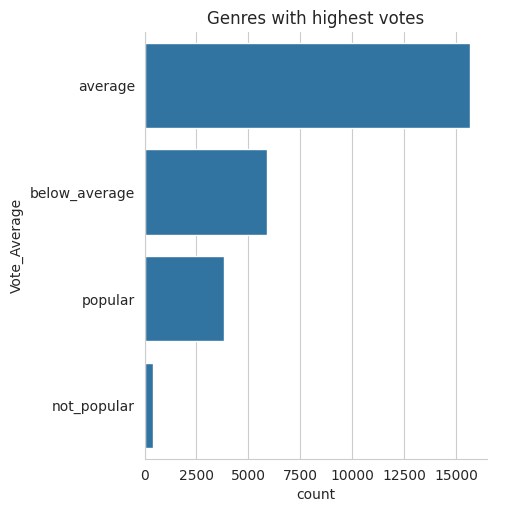

In [47]:
sns.catplot(data=df,y="Vote_Average",kind="count",order=df["Vote_Average"].value_counts().index)
plt.title("Genres with highest votes")
plt.show()

# Q3: What movie got the highest popularity ? what's its genre ?


In [48]:
df[df['Popularity']==df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [53]:
df["Popularity"].sum()

1083277.8969999999

# Q4: What movie got the lowest popularity? what's its genre?

In [49]:
df[df['Popularity']==df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25788,2021,The United States vs. Billie Holiday,13.354,152,average,History
25789,1984,Threads,13.354,186,popular,War
25790,1984,Threads,13.354,186,popular,Drama
25791,1984,Threads,13.354,186,popular,Science Fiction


# Q5 :  Which year has the most filmmed movies?

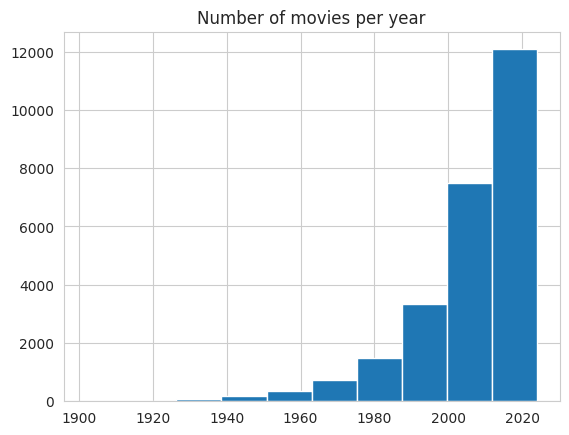

In [57]:
df["Release_Date"].hist()
plt.title("Number of movies per year")
plt.show()

# Conclusion

#Q1: What is the most frequent genre in the dataset?
*   `Drama` genre is the most frequent genre in our dataset and has appeared more than
`14%` of the times among 19 other genres.


# Q2: What genres has highest votes ?
*   here we can see that `14.7 %` are in `populer` category in which `drama` comes first with `20.45 %` of total popularity  

#Q3: What movie got the highest popularity ? what's its genre ?
*   `Spider man: No way home` has the highest populerity and it has Genre   `Action`,`Adventure`,`Science fiction`

#Q4: What movie got the lowest popularity? what's its genre?
*   `The United States vs. Billie Holiday`,`thread` has the lowest popularity with Genre `Music`,`Drama`,`History`,`war`,`science fiction`

#Q5 : Which year has the most filmmed movies?
*   `2020` is the year in which most of the movies released and has the highest filming rate